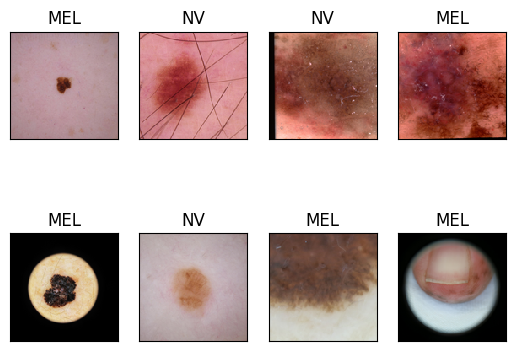

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt



folder = ImageFolder('./a5_data_new/train', transform=torchvision.transforms.ToTensor())
loader = DataLoader(folder, batch_size=8, shuffle=True)

# Xexamples, Yexamples = next(iter(loader))

# for i in range(8):
#     plt.subplot(2,4,i+1)  
#     img = Xexamples[i].numpy().transpose(1, 2, 0)    
#     plt.imshow(img, interpolation='none')
#     plt.title('NV' if Yexamples[i] else 'MEL')
#     plt.xticks([])
#     plt.yticks([])
# plt.show()









In [9]:
## first we train the model here is the fuction for training it

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch

import torch.nn as nn

## lended from lectures evaluates score
def predict_and_evaluate(model, X, Y):

    Xt = torch.tensor(X).type(torch.FloatTensor)
    
    scores = model(Xt).view(-1)
    guesses = (scores > 0).numpy()
    return accuracy_score(Y, guesses)

def train_model(model, Xtrain, Ytrain, Xval, Yval, epochs=10, batch_size=32, learning_rate=0.001):
    optim = torch.optim.Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.BCEWithLogitsLoss()
    train_loader = DataLoader(list(zip(Xtrain, Ytrain)), batch_size=batch_size, shuffle=True)
    acc_history = []
    for epoch in range(epochs):
        model.train()
        lossSum = 0
        for Xbatch, Ybatch in train_loader:
            optim.zero_grad()
            Xbatch = Xbatch.type(torch.float32)
            Ybatch = Ybatch.type(torch.float32)
            outputs = model(Xbatch)
            loss = loss_fn(outputs.view(-1), Ybatch)
            optim.zero_grad()
            loss.backward()
            optim.step()


        ## everything after here is for validation stats
            lossSum += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {lossSum/len(train_loader)}")
        model.eval()
        with torch.no_grad():
            train_acc = predict_and_evaluate(model, Xtrain, Ytrain)
            val_acc = predict_and_evaluate(model, Xval, Yval)


        mean_loss = lossSum / len(loader)

        acc_history.append((train_acc, val_acc))
        
        if (epoch+1) % 5 == 0:
            print(f'Epoch {epoch+1}: loss = {mean_loss:.4f}, train acc = {train_acc:.4f}, val acc = {val_acc:.4f}')
    
    return acc_history
        

## Import train and test sets from the images. The Y values are the names of the folders
Xtrain = []
Ytrain = []
Xval = []
Yval = []

trainFolder = ImageFolder('./a5_data_new/train', transform=torchvision.transforms.ToTensor())
valFolder = ImageFolder('./a5_data_new/val', transform=torchvision.transforms.ToTensor())

Xtrain, Ytrain = zip(*[(image.numpy().flatten(), label) for image, label in trainFolder])
Xval, Yval = zip(*[(image.numpy().flatten(), label) for image, label in valFolder])

n_input_features = Xtrain[0].shape[0]

linear_model = nn.Linear(in_features=n_input_features, out_features=1)
train_model(linear_model, Xtrain, Ytrain, Xval, Yval, epochs=10, batch_size=32, learning_rate=0.001)
           


Epoch 1/10, Loss: 1.28112271309492


C:\Users\casha\AppData\Local\Temp\ipykernel_52704\1242638513.py:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:278.)
  Xt = torch.tensor(X).type(torch.FloatTensor)


Epoch 2/10, Loss: 0.7130512758273984


KeyboardInterrupt: 